# About The Project:


Predicting Hotel Booking Cancellation in Portugal Project. Is a machine learning classification project that will try to predict whether a booking will be cancelled or a booking will not be cancelled using machine learning based on historical data.

The data for this project is from Hotel Booking Demand Dataset Sciencedirect. This data was acquired by extraction from hotel’s Property management system from 2015 to 2017 from hotel in Region Algarve and Lisbon



# Background Information:


Hotel industry is one of the faster growing businesses of tourism sector, especially with the rise of giant OTA that make booking a hotel as easy as is ever been. According to Portugal’s National Institute of Statistic in 2017 hotel revenue rose approximately 18% to $3.6 billion.The growth of hotel industry also could be seen from the total number of hotel guests in portugal doubled it's population count in 2017.

Total of hotel guest in 2017: 20.6 Million

Total Portugal Population in 2017: 10.31 Million


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns', None)

import datetime as dt
warnings.filterwarnings('ignore')

In [3]:
hotel_booking=pd.read_csv('hotel_bookings.csv')
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
hotel_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
# There are some column with null values in the dataframe we will need to imputing and filling with random values.
# there is huge amount of missing value in company column, we need to drop

In [5]:
hotel_booking['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [9]:
# The data is not imbalanced so for accuarcy will be consider as evaluation matrix score

In [7]:
hotel_booking['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [11]:
# The reservation status column will need to be drop for the machine learning since it has canceled status
# it will leak the informatiom to the model regarding latest status of booking and will make model bias
# and it would not  be useful for  predicting for cancelllation since the status only happened after the booking was cancelled or
# after the customer checked out from the hotel

In [8]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [13]:
# there is an 'adr' that is negative .it is impossible to have a negative daily rate as the hotel
# there is 0 adult in data as well we will do a deeper analysis on this because its impossible to have negative 
# booking with 0 adult

# Data explaination

In [14]:
1. hotel :(H1 = Resort Hotel or H2 = City Hotel).

2. is_canceled Value: showing if the booking had been cancelled (1) or not (0).

3. lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

4. arrival_date_year: Year of arrival date.

5. arrival_date_month: The months in which guests are coming.

6. arrival_date_week_number: Week number of year for arrival date.

7. arrival_date_day_of_month: Which day of the months guest is arriving.

8. stays_in_weekend_nights: Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
    
9. stays_in_week_nights: Number of weekdays stay at night (Monday to Friday) in the hotel.

10. adults: Number of adults.

11. children: Number of children.

12. babies: Number of babies.

13. meal: Type of meal booked.

14. country: Country of origin.

15. market_segment: Through which channel hotels were booked.

16. distribution_channel: Booking distribution channel.

17. is_repeated_guest: The values indicating if the booking name was from a repeated guest (1) or not (0).    
    
18. previous_cancellations: Show if the repeated guest has cancelled the booking before.

19. previous_bookings_not_canceled: Show if the repeated guest has not cancelled the booking before.

20. reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21. assigned_room_type: Code for the type of room assigned to the booking. Code is presented instead of designation for anonymity reasons.

22. booking_changes: How many times did booking changes happen.

23. deposit_type: Indication on if the customer deposited something to confirm the booking.

24. agent: If the booking happens through agents or not.

25. company: If the booking happens through companies, the company ID that made the booking or  
    
26. days_in_waiting_list: Number of days the booking was on the waiting list before the confirmation to the customer.

27. customer_type: Booking type like Transient – Transient-Party – Contract – Group.

28. adr: Average Daily Rates that described via way of means of dividing the sum of all accommodations transactions using entire numbers of staying nights.

29. required_car_parking_spaces: How many parking areas are necessary for the customers.

30. total_of_special_requests: Total unique requests from consumers.

31. reservation_status: The last status of reservation, assuming one of three categories: Canceled – booking was cancelled by the customer; Check-Out

32. reservation_status_date: The last status date.   
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    

SyntaxError: invalid syntax (940934753.py, line 1)

# Dataset Cleaning, Preparation and outliers Handling

# Cleaning

In [9]:
# Rechecking the null value
hotel_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
hotel_booking['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [11]:
hotel_booking['children']=hotel_booking['children'].fillna(0)
hotel_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# Filling the null value in the children column
# since the children mean ,median and mode are 0 we will fill it 0

In [12]:
# Computting the country columns
# the country column we will fillit with the most frequent value of the column
hotel_booking['country']=hotel_booking['country'].fillna(hotel_booking['country'].value_counts().index[0])
hotel_booking.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# we will drop agent and company column
# since company column has more than 90% of null value

In [13]:
hotel_booking =hotel_booking.drop(columns = ['agent', 'company'])
hotel_booking.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

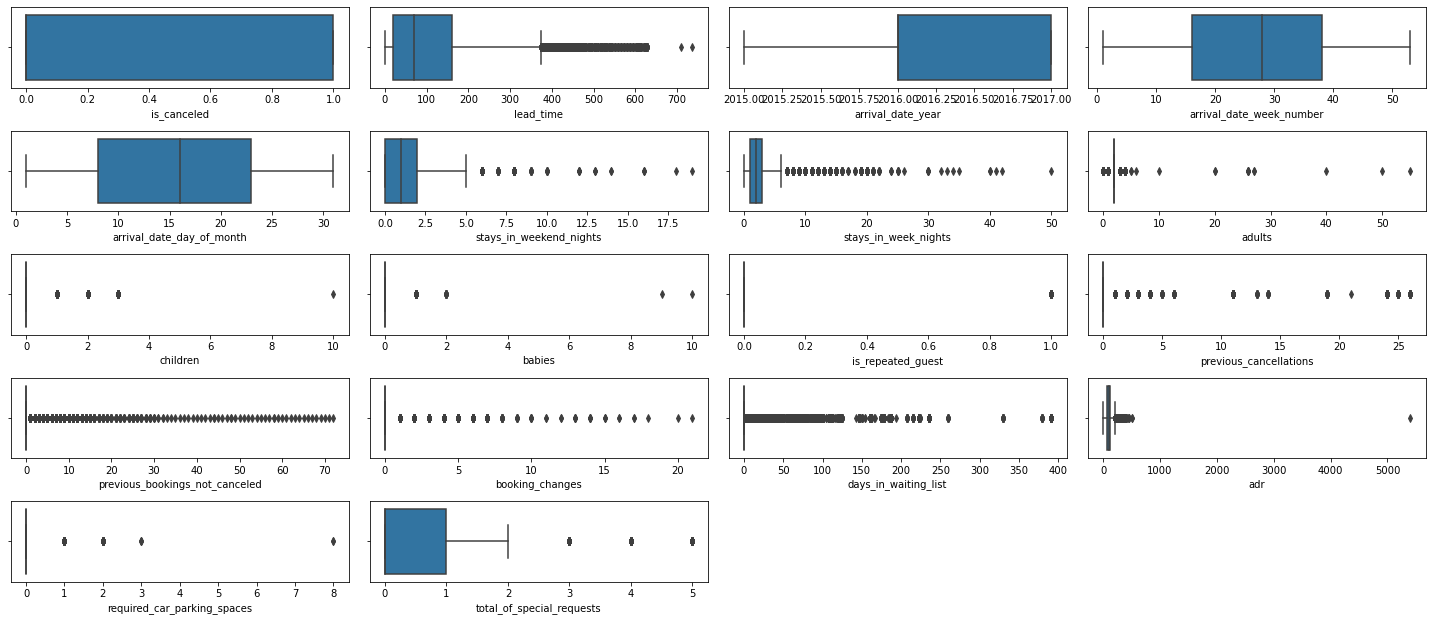

In [14]:
#### since the there is no null value anymore in the data now i will check the outliers 
plt.figure(figsize = (20, 10))
x = 1 

for column in hotel_booking.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(hotel_booking[column])
    x+=1
    
plt.tight_layout()


In [ ]:
# # we can see that there are many outliers in many of the columns 
# we will handle the outliers by binning the columns that has outliers in it 
# and from the box plot there are columns that has a random value like 0 number of adults 
# and negative amount of adr 
# there's one value of adr that's above 5000 and there's only 1 data point since it so random we will drop that one outliers in
# the adr colummn
#since this data comes from both region and knowing the avg ADR is less than 5000 we will be dropping the row that has more than
# 5000 euro ADR

<AxesSubplot:xlabel='adr'>

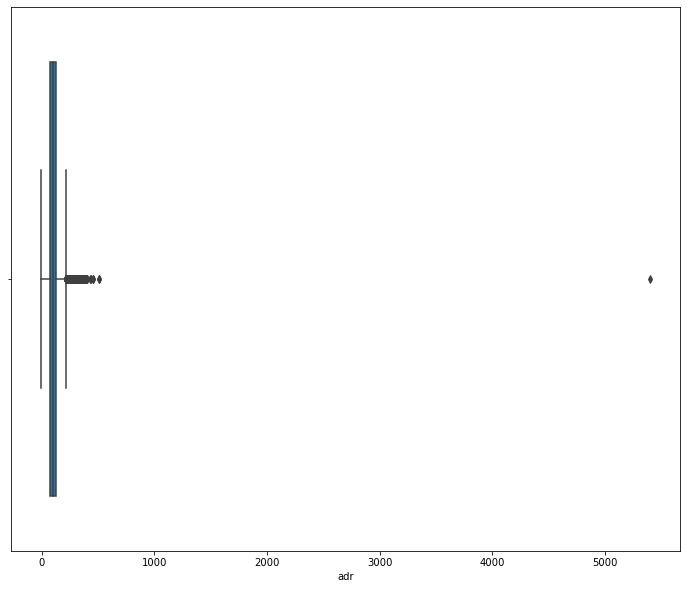

In [15]:
plt.figure(figsize=(12,10))
sns.boxplot(x=hotel_booking['adr'])

In [ ]:
# here we can see there is huge outliers in adr column so we will need to be drop the row it has more than 5000 euro

# not belong to the normal data distribution

In [17]:
# adult
# since its impossible to have 0 adults to book a hotel room
hotel_booking.drop(labels = hotel_booking[hotel_booking['adults'] == 0].index, axis = 0, inplace = True)
hotel_booking[hotel_booking['adults'] == 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [18]:
# ADR

hotel_booking[hotel_booking['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [19]:
hotel_booking=hotel_booking.drop(hotel_booking[hotel_booking.adr<0].index)
hotel_booking[hotel_booking['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [20]:
hotel_booking = hotel_booking.drop(hotel_booking[hotel_booking.adr > 5000].index)
hotel_booking[hotel_booking['adr']> 5000]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


# Arrival column

In [21]:
## getting bookin  Arrival date as Date time object 

hotel_booking['arrival_date'] = hotel_booking['arrival_date_year'].astype(str) + '-' + hotel_booking['arrival_date_month'] + '-' + hotel_booking['arrival_date_day_of_month'].astype(str)
hotel_booking['arrival_date'] = pd.to_datetime(hotel_booking['arrival_date'])
hotel_booking.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


In [22]:
# Getting arrival month

hotel_booking['arrival_month']=hotel_booking['arrival_date'].dt.month
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7


In [23]:
# getting arrival day

hotel_booking['arrival_day']=hotel_booking['arrival_date'].dt.day_name()
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday


In [24]:
# getting arrival month

hotel_booking['month_year']=pd.to_datetime(hotel_booking['arrival_date']).dt.to_period('M')
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07


# Total Stays Column
# getting the total stays column by adding the weekday stays and the weekend # stays

In [25]:
hotel_booking['total_stays']=hotel_booking['stays_in_weekend_nights']+hotel_booking['stays_in_week_nights']
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2


In [26]:
hotel_booking[hotel_booking['total_stays']==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06,2015-07-06,7,Monday,2015-07,0
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07,2015-07-07,7,Tuesday,2015-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,0.0,0,SC,FRA,Direct,Direct,0,0,0,A,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06,2017-07-06,7,Thursday,2017-07,0
117701,City Hotel,0,0,2017,August,32,8,0,0,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08,2017-08-08,8,Tuesday,2017-08,0
118029,City Hotel,0,0,2017,August,33,14,0,0,2,0.0,0,BB,PRT,Direct,Direct,1,0,0,A,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14,2017-08-14,8,Monday,2017-08,0
118631,City Hotel,0,78,2017,August,34,23,0,0,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23,2017-08-23,8,Wednesday,2017-08,0


In [27]:
hotel_booking['guests'] = hotel_booking['adults'] + hotel_booking['children'] + hotel_booking['babies']
hotel_booking.head()

# total guest of the hotel booking by adding the babies children and babies

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0


In [28]:
hotel_booking['kids']=hotel_booking['children'] + hotel_booking['babies']
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


# meal column

In [29]:
hotel_booking['meal'].unique()
# we can see there is an undefined value from the dataset
# however from the explanation from the source of the dataset that undifed meal package is same as SC (No Meal Package)
# so we will replcae the undefined to SC 

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [31]:
hotel_booking['meal'] = hotel_booking['meal'].str.replace('Undefined', 'SC')
hotel_booking['meal'].unique()

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

In [32]:
# now lets check all the columns description and  all the columns boxplot before we moving on to the EDA

hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,0.926932,2.499029,1.862689,0.100433,0.007951,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,6.552381,3.425961,1.971072,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.995235,1.897747,0.570064,0.390219,0.097474,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,3.089348,2.541649,0.719446,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


# Dropping redundant column

In [ ]:
# since we have column that is almost similar value like children and babies , we have combined into kids
# stats in weekend nights and stays in week nights now combined into total stays
# so we  will be dropping both columns 

In [33]:
hotel_booking = hotel_booking.drop(columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'babies', 'children'])
hotel_booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,arrival_month,arrival_day,month_year,total_stays,guests,kids
0,Resort Hotel,0,342,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
1,Resort Hotel,0,737,2015,July,27,1,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,7,Wednesday,2015-07,0,2.0,0.0
2,Resort Hotel,0,7,2015,July,27,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
3,Resort Hotel,0,13,2015,July,27,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,7,Wednesday,2015-07,1,1.0,0.0
4,Resort Hotel,0,14,2015,July,27,1,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,7,Wednesday,2015-07,2,2.0,0.0


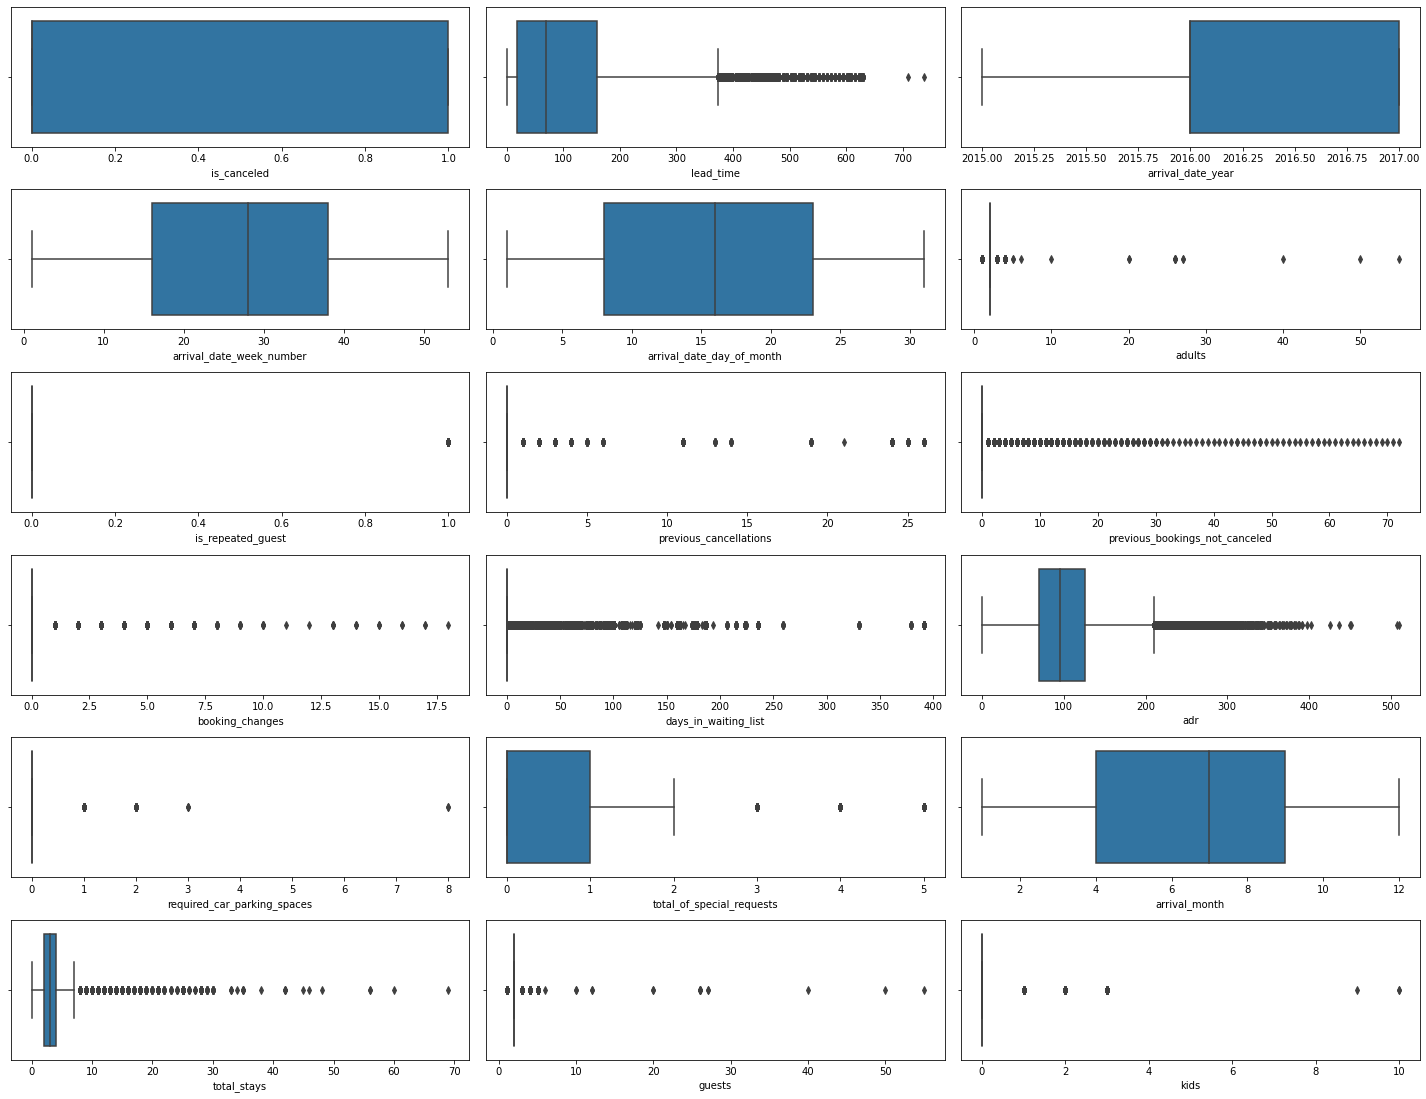

In [34]:
plt.figure(figsize=(20,20))
x=1
for column in hotel_booking.describe().columns:
    plt.subplot(8,3,x)
    sns.boxplot(hotel_booking[column])
    x+=1
plt.tight_layout()

In [ ]:
# as we can see that there are still many outliers in many of the columns 
# we are not going to drop the outliers here as outliers could provide many useful information 
# we will bin in but and create new column and hopefully we will be able to extract some more information by doing that

In [35]:
hotel_booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,total_stays,guests,kids
count,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000,118985.000000
mean,0.370753,104.070353,2016.156356,27.164407,15.796781,1.862689,0.031542,0.087339,0.137328,0.218507,2.325604,101.964460,0.062655,0.570652,6.552381,3.425961,1.971072,0.108383
std,0.483008,106.891161,0.707743,13.598771,8.781164,0.570064,0.174777,0.845700,1.499529,0.638068,17.614343,48.053329,0.245546,0.792403,3.089348,2.541649,0.719446,0.404480
min,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,4.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,7.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,9.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,1.000000,26.000000,72.000000,18.000000,391.000000,510.000000,8.000000,5.000000,12.000000,69.000000,55.000000,10.000000


In [36]:
hotel_booking.describe(include = 'O').T

,count,unique,top,freq
hotel,118985,2,City Hotel,78939
arrival_date_month,118985,12,August,13829
meal,118985,4,BB,92018
country,118985,177,PRT,48917
market_segment,118985,8,Online TA,56221
distribution_channel,118985,5,TA/TO,97559
reserved_room_type,118985,9,A,85861
assigned_room_type,118985,11,A,73982
deposit_type,118985,3,No Deposit,104237
customer_type,118985,4,Transient,89336


# EDA

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

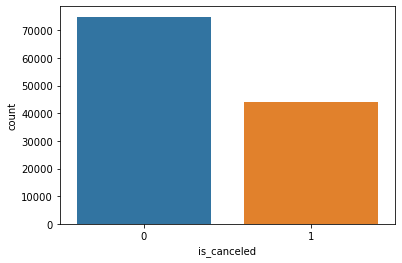

In [37]:
sns.countplot(x='is_canceled',data=hotel_booking)

<AxesSubplot:xlabel='hotel', ylabel='count'>

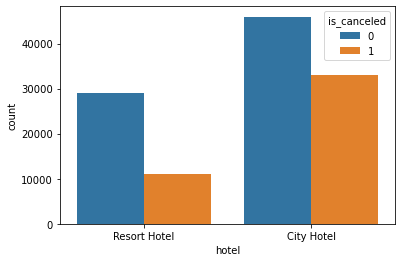

In [38]:
sns.countplot(x='hotel',hue='is_canceled',data=hotel_booking)

<AxesSubplot:xlabel='lead_time', ylabel='Count'>

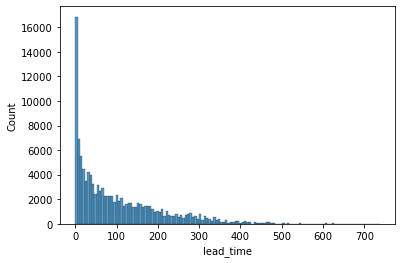

In [39]:
sns.histplot(x='lead_time',data=hotel_booking)

<AxesSubplot:xlabel='adr', ylabel='Count'>

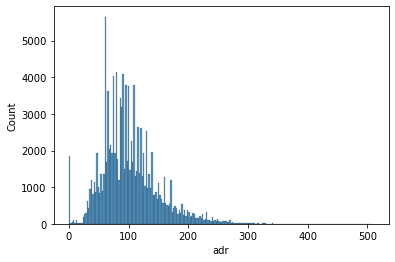

In [40]:
sns.histplot(x='adr',data=hotel_booking)

<AxesSubplot:>

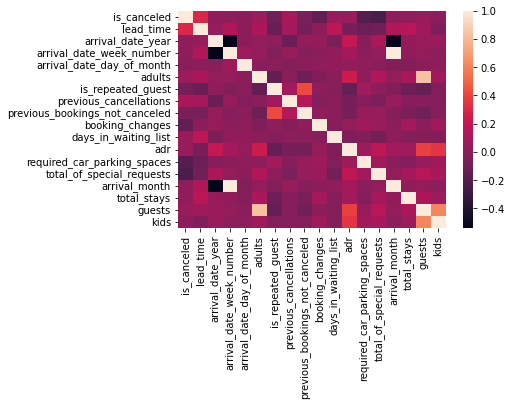

In [41]:
corr=hotel_booking.corr()
sns.heatmap(corr)

In [42]:
corr['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.293000
previous_cancellations            0.110223
adults                            0.058891
days_in_waiting_list              0.054358
adr                               0.047556
guests                            0.044868
total_stays                       0.018410
arrival_date_year                 0.016461
arrival_month                     0.011182
arrival_date_week_number          0.008326
kids                             -0.003193
arrival_date_day_of_month        -0.005897
previous_bookings_not_canceled   -0.057405
is_repeated_guest                -0.083771
booking_changes                  -0.144865
required_car_parking_spaces      -0.195864
total_of_special_requests        -0.235262
Name: is_canceled, dtype: float64

In [43]:
hotel_booking.groupby('hotel')['is_canceled'].mean()


hotel
City Hotel      0.417968
Resort Hotel    0.277681
Name: is_canceled, dtype: float64

In [ ]:
hotel_booking.groupby('market_segment')['is_canceled'].mean()

In [ ]:
hotel_booking.groupby('customer_type')['is_canceled'].mean()


In [ ]:
hotel_booking.groupby('deposit_type')['is_canceled'].mean()


In [ ]:
hotel_booking.groupby('is_canceled')['lead_time'].mean()


In [ ]:
hotel_booking.groupby('is_canceled')['adr'].mean()


In [ ]:
hotel_booking.groupby('arrival_date_month')['is_canceled'].mean()


In [ ]:
hotel_booking.groupby('arrival_date_year')['is_canceled'].mean()

In [ ]:
sns.countplot(x='reserved_room_type', hue='is_canceled', data=hotel_booking)


In [ ]:
sns.countplot(x='assigned_room_type', hue='is_canceled', data=hotel_booking)


In [ ]:
sns.scatterplot(x='lead_time', y='arrival_date_month', hue='is_canceled', data=hotel_booking)


In [ ]:
sns.catplot(x='customer_type', hue='market_segment', col='is_canceled', data=hotel_booking, kind='count')

In [ ]:
hotel_booking.isna().sum()

In [ ]:
hotel_booking.head(10)

In [ ]:
# Split into features and target
X = hotel_booking.drop(['is_canceled'], axis=1)
y = hotel_booking['is_canceled']

# Split into categorical and numerical features
cat_features = ['hotel', 'meal', 'country', 'market_segment', 'distribution_channel']
num_features = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
                'total_stays', 'adults', 'guests', 'previous_cancellations',
                'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr',
                'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
X_cat = X[cat_features]
X_num = X[num_features]

In [ ]:
# One-hot encode categorical features


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat)
print(X_cat_encoded)


In [ ]:
# Scale numerical features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)
print(X_num_scaled)


In [ ]:
# Concatenate the encoded categorical and scaled numerical features
X_preprocessed = pd.concat([pd.DataFrame(X_cat_encoded.toarray()), pd.DataFrame(X_num_scaled)], axis=1)
print(X_preprocessed)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
X_train.head()

In [ ]:
X_train.shape

In [ ]:
y_test.head()

# Logistic Regression

In [ ]:
# 1.import the model from sklearn
from sklearn.linear_model import LogisticRegression

# 2.Initilize
logmodel = LogisticRegression()

# 3.train
logmodel.fit(X_train,y_train)


# 4.predict
predictions = logmodel.predict(X_test)

In [ ]:
predictions[:10]

# Evaluation
# We can check precision,recall,f1-score using classification report!


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [ ]:
results = confusion_matrix(y_test, predictions) 

results
 

In [ ]:
accuracy_score(y_test, predictions) 


In [ ]:
y_test[:10]

In [ ]:
predictions[:10]

In [ ]:
print(classification_report(y_test,predictions))

# Knn Algorithm

In [ ]:
# Import the model from sklearn
from sklearn.neighbors import KNeighborsClassifier


# 2.Initilize
knn = KNeighborsClassifier()

# 3.train
knn.fit(X_train,y_train)


# 4.predict
predictions = knn.predict(X_test)



In [ ]:
predictions[:10]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

In [ ]:
results=confusion_matrix(y_test,predictions)
results

In [ ]:
accuracy_score(y_test,predictions)

In [ ]:
y_test[:10]

In [ ]:
predictions[:10]

In [ ]:
print(classification_report(y_test,predictions))

# Decision Tree Algorithm

In [ ]:
# Import the model from sklearn

from sklearn.tree import DecisionTreeClassifier

# Intilize
dtc=DecisionTreeClassifier()

# Train
dtc.fit(X_train,y_train)

# Predict
predictions=dtc.predict(X_test)

In [ ]:
predictions[:10]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(y_test,predictions)
results

In [ ]:
accuracy_score(y_test,predictions)

In [ ]:
y_test[:10]

In [ ]:
predictions[:10]

In [ ]:
print(classification_report(y_test,predictions))

# Random Forest Algorithm

In [ ]:
# Import the model from sklearn

from sklearn.ensemble import RandomForestClassifier

# intilize

rfc=RandomForestClassifier(n_estimators=100,random_state=42)

# Train

rfc.fit(X_train,y_train)

# predict

predictions=rfc.predict(X_test)


In [ ]:
y_test[:10]

In [ ]:
predictions[:10]

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(y_test,predictions)
results

In [ ]:
accuracy_score(y_test,predictions)


In [ ]:
y_test[:10]

In [ ]:
predictions[:10]

In [ ]:
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.metrics import roc_curve

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, predictions, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In [ ]:
# The given dataset is a supervised classification dataset. 
# It holds booking information for a city hotel and a resort hotel with information such as How and when the booking was made,
# the length of passengers’ stay with the number of parking slots available, the number of adults, children, and babies. 
# The Logistic regression, K-Nearest Neighbor, Decision Tree, Random Forest algorithms are used to handle this 
# supervised classification model. Among these four machine learning algorithms, Random forest and Decision trees perform well
# with respect to accuracy.

 